In [37]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
dataset_path = "C:\\Users\\shubh\\Desktop\\CSV files\\data set"

In [39]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, folder_name in zip([0, 1], ["C:\\Users\\shubh\\Desktop\\CSV files\\data set\\First Print", "C:\\Users\\shubh\\Desktop\\CSV files\data set\\Second Print"]):  # Match exact folder names
        class_folder = os.path.join(folder, folder_name)
        count = 0
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                images.append(img)
                labels.append(label)
                count += 1
        print(f"Loaded {count} images from {folder_name}")
    return np.array(images), np.array(labels)


In [40]:
X, y = load_images_from_folder(dataset_path)
X = X / 255.0  # Normalize pixel values
X = X.reshape(-1, 128, 128, 1)

Loaded 100 images from C:\Users\shubh\Desktop\CSV files\data set\First Print
Loaded 100 images from C:\Users\shubh\Desktop\CSV files\data set\Second Print


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print("Train labels distribution:", np.bincount(y_train))
print("Test labels distribution:", np.bincount(y_test))

Train labels distribution: [79 81]
Test labels distribution: [21 19]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

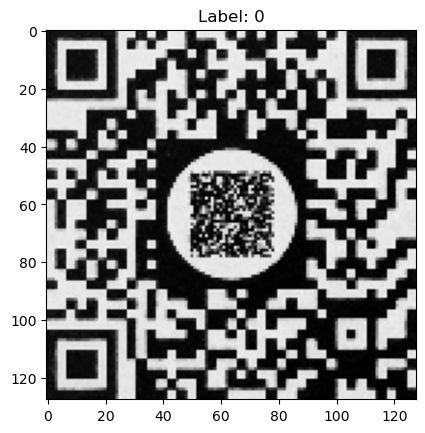

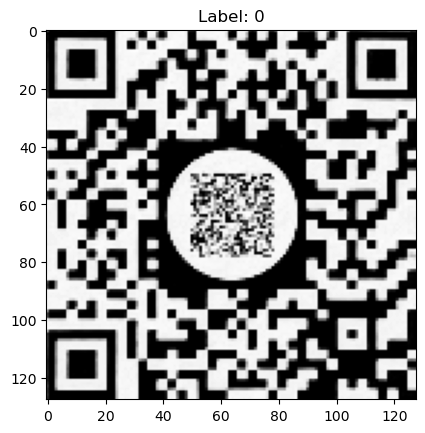

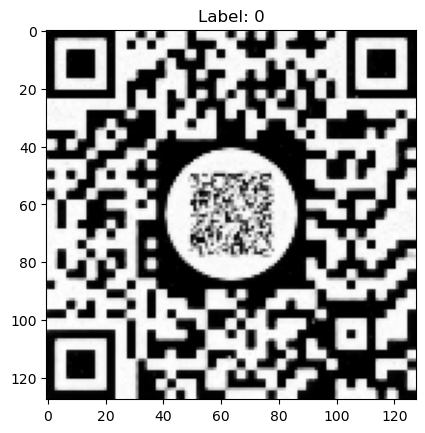

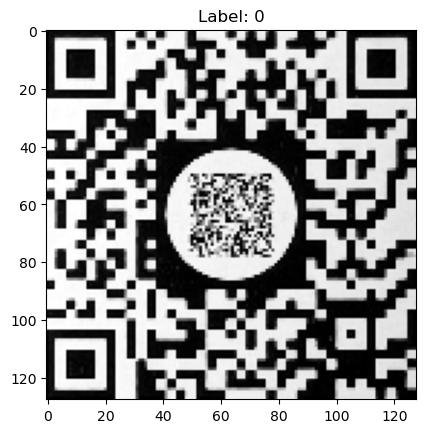

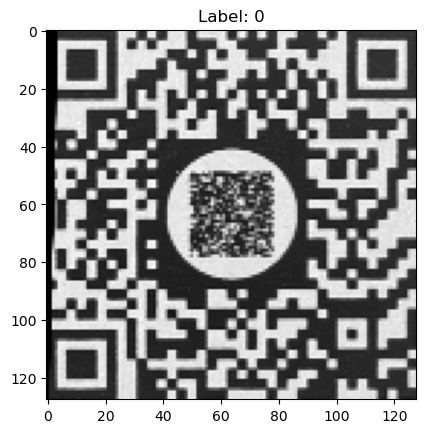

In [44]:
for i in range(5):
    plt.imshow(X[i].reshape(128, 128), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.show()

In [45]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [46]:
print("Unique classes in y_train:", np.unique(y_train, return_counts=True))
print("Unique classes in y_test:", np.unique(y_test, return_counts=True))

Unique classes in y_train: (array([0, 1]), array([80, 80], dtype=int64))
Unique classes in y_test: (array([0, 1]), array([20, 20], dtype=int64))


In [47]:
np.unique(y, return_counts=True)

(array([0, 1]), array([100, 100], dtype=int64))

In [48]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train)
svm_preds = svm_model.predict(X_test_flat)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [49]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.4534 - loss: 1.9919 - val_accuracy: 0.5000 - val_loss: 0.7225
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.5536 - loss: 0.8088 - val_accuracy: 0.8500 - val_loss: 0.6432
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.6500 - loss: 0.6222 - val_accuracy: 0.8000 - val_loss: 0.5974
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.8562 - loss: 0.5441 - val_accuracy: 0.7750 - val_loss: 0.4896
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.8854 - loss: 0.3733 - val_accuracy: 0.9000 - val_loss: 0.3577
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.8851 - loss: 0.3022 - val_accuracy: 0.9250 - val_loss: 0.2972
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - accuracy: 0.9247 - loss: 0.2253 - val_accuracy: 0.8250 - val_loss: 0.3177
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.9392 - loss: 0.1851 - val_accuracy: 0.9500 - val_loss:

In [51]:
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")
print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))
print(classification_report(y_test, y_pred_cnn))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
CNN Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



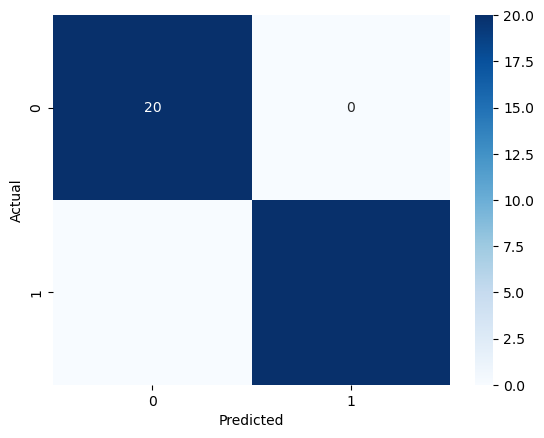

In [52]:
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 